# Doing Usual imports

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline
sns.set_style('whitegrid')

# Grap the data

In [8]:
df = pd.read_csv(r'/Users/omarabdelaleem/Downloads/archive/neo.csv')

In [9]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# Columns explanation:
    id: Unique Identifier for each Asteroid
    name: Name given by NASA
    est_diameter_min: Minimum Estimated Diameter in Kilometres
    est_diameter_max: Maximum Estimated Diameter in Kilometres
    relative_velocity: Velocity Relative to Earth
    miss_distance: Distance in Kilometres missed
    orbiting_body: Planet that the asteroid orbits
    sentry_object: Included in sentry - an automated collision monitoring system
    absolute_magnitude: Describes intrinsic luminosity
    hazardous: Boolean feature that shows whether asteroid is harmful or not

# Exploring the data and gathering more information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [129]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

Interesting that we don't have any missing values in our data

In [13]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [14]:
print('The shape of our features is:', df.shape)

The shape of our features is: (90836, 10)


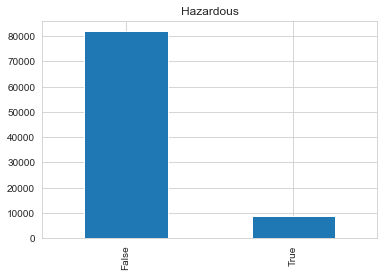

In [127]:
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

Some Reassuring insights, we don't have much number of surrounding objects to our planet that are aiming to hurt us.

<AxesSubplot:>

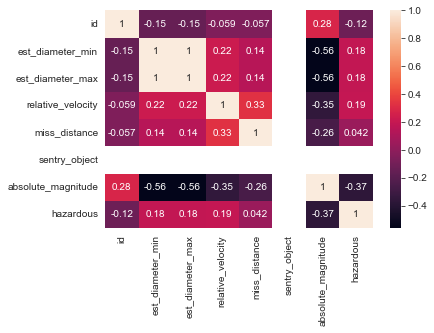

In [125]:
sns.heatmap(df.corr(),annot=True,)

As we can see from the heatmap, There're no strng correlation between the features in our data frame, and also there're some redundant features that we need to drop such as ('orbiting_body','sentry_object','name')

In [24]:
dframe = df.drop(['orbiting_body','sentry_object'],axis=1)

In [42]:
dframe.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


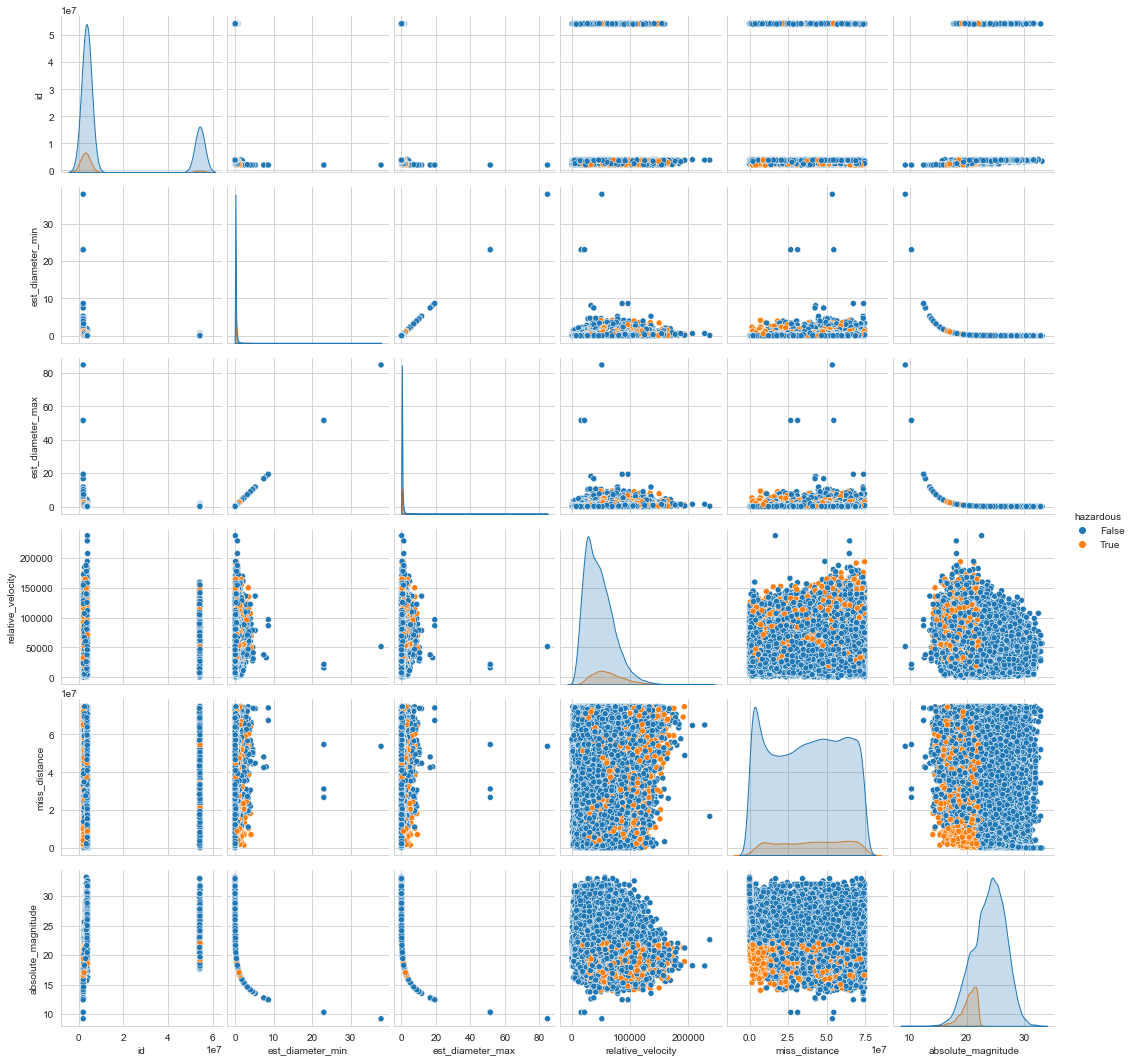

In [21]:
sns.pairplot(dframe,aspect=1,kind='scatter',hue='hazardous')

Intresting!
Looking into the data we can notice that there'r no missing vlues and initially, there are no huge outlires as well.

# Main Questions that we are trying to answer:
    what is surrounding us? and what can harm us amongst those?

# Data Preparation 

In [87]:
N_target = dframe['hazardous']
N_Features = dframe.drop(['hazardous','name'],axis=1)
Y=N_target
X=N_Features

In [88]:
def hazard(boolian):
    ''' Takes in numerical class, returns flower name'''
    if boolian == False:
        return 'Safe'
    else:
        return 'hazardous'

# Apply
Y= Y.apply(hazard)

In [89]:
X.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


In [91]:
Y.head()

0         Safe
1    hazardous
2         Safe
3         Safe
4    hazardous
Name: hazardous, dtype: object

In [92]:
Y=np.array(Y)
Y

array(['Safe', 'hazardous', 'Safe', ..., 'Safe', 'Safe', 'Safe'],
      dtype=object)

# Model selection and training

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [107]:
#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1,test_size=0.25)

In [108]:
#Model Fitting
logreg.fit(X_train,Y_train)

LogisticRegression()

In [109]:
#Performance Check
from sklearn import metrics
predicted = logreg.predict(X_test)
print("Accuracy score = ",metrics.accuracy_score(Y_test,predicted))

Accuracy score =  0.9025936853229997


Looks like our model had almost 90% accuracy

As shown, our model reached 90% accuracy score and while thinking how to improve its performance, I want to try the K-nearest Neighbors algorithm to see if this could help increasing the accuracy

# Importing KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,Y_train)

knn_pred = knn.predict(X_test)

print("Knn Accuracy score =", metrics.accuracy_score(Y_test,knn_pred))

Knn Accuracy score = 0.9051477387819807


In [122]:
# Test k values 1 through 100
k_range = range(1, 100)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, knn_pred))

Text(0, 0.5, 'Testing Accuracy')

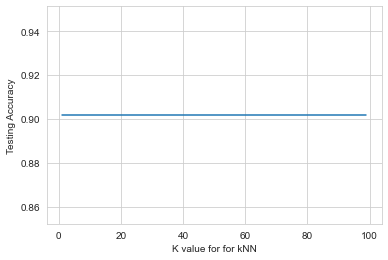

In [123]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

Unfortunately, the KNN was not that helpful for us and maximum accuracy we could get is 90.5%